# Importing Libraries

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [362]:
data=pd.read_csv(r"F:\ML- Codes\Machine_learning\Regresstion\Advertising.csv")

Checking for null values

In [363]:
print(data.isna().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [364]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [365]:
print(data.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [378]:
print(data.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


Heat Map of columns

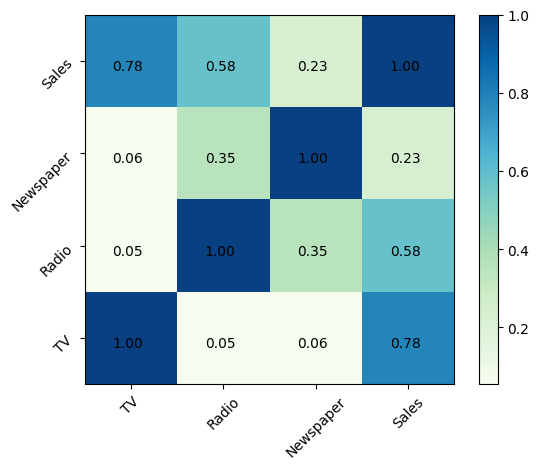

In [384]:
plt.ylim(-0.5,3.5)
plt.imshow(data.corr(),cmap=plt.cm.GnBu,interpolation='nearest')
plt.colorbar()
ticket=[i for i in range(len(data.columns))]
plt.xticks(ticket,data.columns,rotation=45)
plt.yticks(ticket,data.columns,rotation=45)
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text='{:.2f}'.format(data.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)
plt.show()

Dividing dataset into dependent and independent data

In [366]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [367]:
print(type(X))

<class 'numpy.ndarray'>


In [368]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=100)

In [369]:
print(x_train.shape)

(180, 3)


In [370]:
print(x_test.shape)

(20, 3)


In [371]:
y_train=y_train.reshape(-1,1)

In [372]:
print(y_train.shape)

(180, 1)


# Preparing Linear Regression model...

In [373]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [389]:
print("interception : ",lr.intercept_)
print("Coefficient : ")
n=(list(zip(data.iloc[:,:-1],lr.coef_)))
n=n[0][1]
m=[i for i in data.columns]
for i in range(len(n)):
    print(m[i]," -- ",n[i])

interception :  [2.90911135]
Coefficient : 
TV  --  0.04545698966500146
Radio  --  0.18789035405717192
Newspaper  --  0.0006479583241943421


Predicting the test data by using Regression model

In [374]:
y_pred=lr.predict(x_test)
y_pred=y_pred.ravel()

Comparing the original and predicted data.....

In [375]:
fdata=pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_pred})
print(fdata.head())

   Actual_data  Predicted_data
0          6.6       10.605397
1         20.7       20.185040
2         17.2       16.919665
3         19.4       19.137654
4         21.8       21.050932


In [376]:
fdata['Error']=fdata["Actual_data"]-fdata["Predicted_data"]
print(fdata.head())

   Actual_data  Predicted_data     Error
0          6.6       10.605397 -4.005397
1         20.7       20.185040  0.514960
2         17.2       16.919665  0.280335
3         19.4       19.137654  0.262346
4         21.8       21.050932  0.749068


## Visualising the Linear regression results

In [377]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("Mean squared error : ",mean_squared_error(y_test,y_pred))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r Square : {:.2f}".format(r2_score(y_test,y_pred)))

Mean absolute error :  1.0231743090279923
Mean squared error :  1.834808919761425
Root mean squared error :  1.354551187575215
r Square : 0.92
